### Clusters Jerarquico

El departamento de Machine Learning de la Comunidad de Madrid quiere segmentar sus municipios en grupos homogéneos para ayudar a diseñar políticas públicas diferenciadas (empleo, cultura, etc.). Para ello dispone de información socioeconómica de una muestra de $18$ municipios. Las variables disponibles son: `Municipio` indicando el  identificador del municipio; `Renta_media` para la renta media anual por habitante (en euros); `Tasa_paro` incluye la tasa de paro ($\%$) del municipio; `Densidad_pob` recoge la densidad de población (habitantes por $km^2$); `Gasto_cultural` en el que se indica el gasto municipal en cultura por habitante (en euros). La base de datos se resume en la siguiente tabla:

| Municipio | Renta_media | Tasa_paro | Densidad_pob | Gasto_cultural |
| --------- | ----------- | --------- | ------------ | -------------- |
| Mun_01    | 29490       | 3.4       | 2425         | 135.8          |
| Mun_02    | 27585       | 1.4       | 324          | 133.3          |
| Mun_03    | 29943       | 12.9      | 1503         | 89.0           |
| Mun_04    | 32569       | 6.1       | 1118         | 102.3          |
| Mun_05    | 27298       | 7.3       | 1443         | 118.3          |
| Mun_06    | 16298       | 11.3      | 2403         | 79.4           |
| Mun_07    | 21738       | 14.8      | 931          | 43.0           |
| Mun_08    | 19302       | 17.4      | 2119         | 50.4           |
| Mun_09    | 15592       | 12.4      | 113          | 27.3           |
| Mun_10    | 18628       | 18.5      | 1068         | 25.1           |
| Mun_11    | 20610       | 9.6       | 2024         | 100.3          |
| Mun_12    | 20603       | 10.8      | 1634         | 113.9          |
| Mun_13    | 22726       | 9.6       | 2506         | 78.2           |
| Mun_14    | 16260       | 19.4      | 108          | 105.1          |
| Mun_15    | 16825       | 11.9      | 1694         | 89.0           |
| Mun_16    | 20313       | 7.8       | 769          | 63.9           |
| Mun_17    | 18962       | 15.3      | 1094         | 89.0           |
| Mun_18    | 22943       | 7.1       | 1867         | 118.5          |

Completar los siguientes apartados:

1. Crear la base de datos a partir de dicha información y realizar el análisis exploratorio.
2. Realizar el análisis de la existencia de relación y semejanza entre las variables.
3. Calcular la matriz de proximidad utilizando la distancia euclidiana y Manhatann.
4. Estimar e interpretar los modelos de clustering jerárquicos divisivos considerando dichas distancias.
5. Calcular el número de clústers óptimos para cada una de las distancias consideradas y los tres criterios vistos.

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
# Crear el data frame con los datos indicados
wdata <- data.frame(
  Municipio = paste0("Mun_", sprintf("%02d", 1:18)),
  Renta_media = c(29490, 27585, 29943, 32569, 27298, 16298, 21738, 19302, 15592,
                  18628, 20610, 20603, 22726, 16260, 16825, 20313, 18962, 22943),
  Tasa_paro = c(3.4, 1.4, 12.9, 6.1, 7.3, 11.3, 14.8, 17.4, 12.4,
                18.5, 9.6, 10.8, 9.6, 19.4, 11.9, 7.8, 15.3, 7.1),
  Densidad_pob = c(2425, 324, 1503, 1118, 1443, 2403, 931, 2119, 113,
                   1068, 2024, 1634, 2506, 108, 1694, 769, 1094, 1867),
  Gasto_cultural = c(135.8, 133.3, 89.0, 102.3, 118.3, 79.4, 43.0, 50.4, 27.3,
                     25.1, 100.3, 113.9, 78.2, 105.1, 89.0, 63.9, 89.0, 118.5)
)

wdata


Municipio,Renta_media,Tasa_paro,Densidad_pob,Gasto_cultural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mun_01,29490,3.4,2425,135.8
Mun_02,27585,1.4,324,133.3
Mun_03,29943,12.9,1503,89.0
Mun_04,32569,6.1,1118,102.3
Mun_05,27298,7.3,1443,118.3
Mun_06,16298,11.3,2403,79.4
Mun_07,21738,14.8,931,43.0
Mun_08,19302,17.4,2119,50.4
Mun_09,15592,12.4,113,27.3


In [ ]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

  Municipio          Renta_media      Tasa_paro       Densidad_pob   
 Length:18          Min.   :15592   Min.   : 1.400   Min.   : 108.0  
 Class :character   1st Qu.:18712   1st Qu.: 7.425   1st Qu.: 965.2  
 Mode  :character   Median :20606   Median :11.050   Median :1473.0  
                    Mean   :22094   Mean   :10.944   Mean   :1396.8  
                    3rd Qu.:26209   3rd Qu.:14.325   3rd Qu.:1984.8  
                    Max.   :32569   Max.   :19.400   Max.   :2506.0  
 Gasto_cultural  
 Min.   : 25.10  
 1st Qu.: 67.47  
 Median : 89.00  
 Mean   : 86.77  
 3rd Qu.:111.70  
 Max.   :135.80  

In [ ]:
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(wdata, sd, na.rm = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”


Municipio    Renta_media      Tasa_paro   Densidad_pob Gasto_cultural 
            NA    5198.391020       4.994965     764.763727      33.703168

In [ ]:
# Curtosis de todas las variables numéricas
sapply(wdata[sapply(wdata, is.numeric)], kurtosis, na.rm = TRUE)


Renta_media      Tasa_paro   Densidad_pob Gasto_cultural 
      2.186739       2.330953       2.034180       2.214960

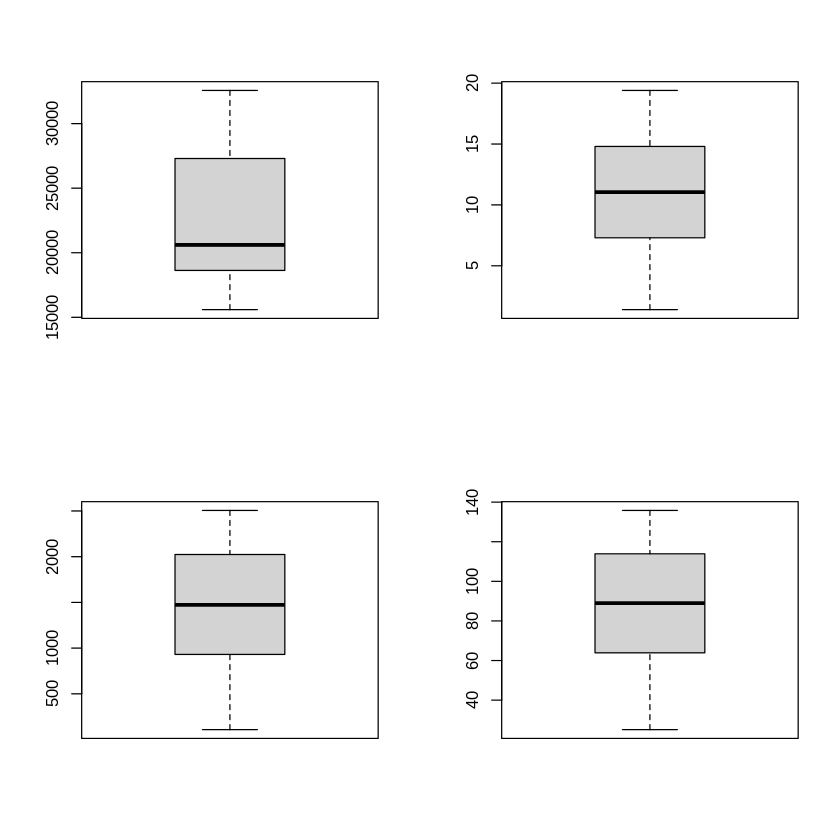

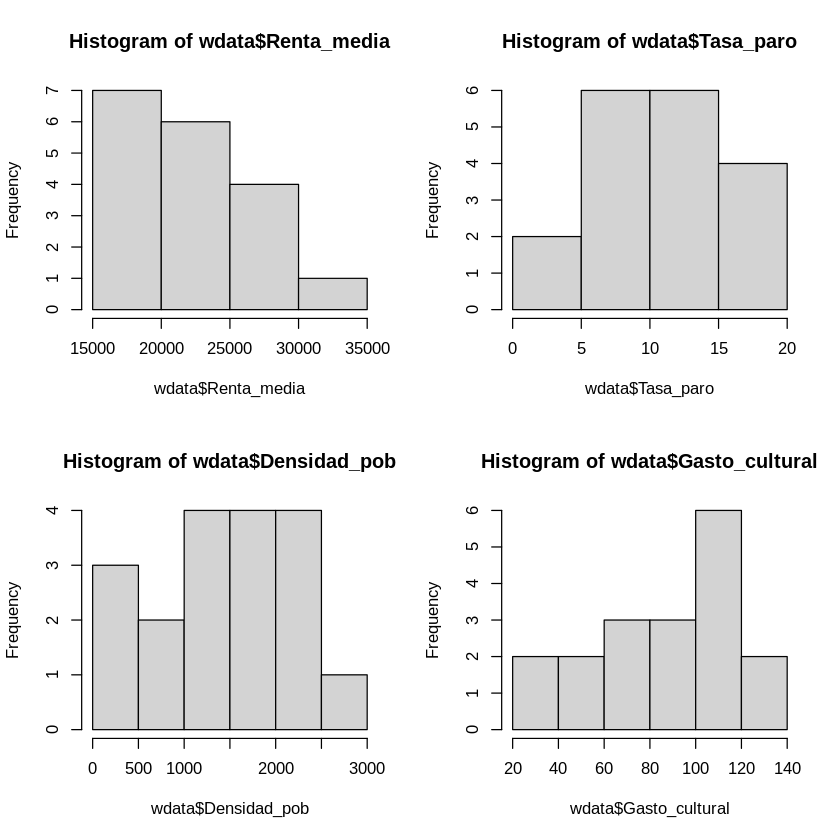

In [ ]:
par(mfrow = c(2,2))  # organizamos los gráficos
boxplot(wdata$Renta_media)
boxplot(wdata$Tasa_paro)
boxplot(wdata$Densidad_pob)
boxplot(wdata$Gasto_cultural)

hist(wdata$Renta_media)
hist(wdata$Tasa_paro)
hist(wdata$Densidad_pob)
hist(wdata$Gasto_cultural)
par(mfrow = c(1,1))  # volvemos a la organización normal

**<u>Interpretación resultados</u>.-**  

La base de datos posee 18 observaciones una por municipio y cinco variables que describen distintas dimensiones socioeconómicas y demográficas de los municipios, sin presencia de datos anómalos ni valores atípicos. A continuación, se interpretan los estadísticos descriptivos de cada variable cuantitativa.

**Municipio** funciona como identificador de los municipios, hay 18 distintos.

**Renta_media** recoge la renta media anual por habitante. Presenta valores entre 15 592 y 32 569 euros, con una mediana cercana a 20 606 euros y una media en torno a 22 094 euros, lo que indica ligeras diferencias entre tendencia central y dispersión. La desviación estándar (5 198 euros) refleja una variabilidad moderada en los ingresos municipales. Su curtosis (≈ 2.19) sugiere una distribución ligeramente platicúrtica, es decir, más achatada que la normal, con colas algo menos pesadas. En términos contextuales, se observa una heterogeneidad moderada en el nivel económico de los municipios, aunque sin extremos marcados.

**Tasa_paro** expresa el porcentaje de población desempleada. Oscila entre el 1.4 % y el 19.4 %, con una media de 10.94 % y desviación estándar de aproximadamente 5 %. La curtosis (2.33) indica también una distribución algo más plana de lo normal, con valores repartidos de forma relativamente uniforme dentro del rango. Esta variabilidad revela diferencias relevantes en la situación laboral de los municipios, lo que puede influir en dinámicas socioeconómicas locales.

**Densidad_pob**, que mide habitantes por kilómetro cuadrado, presenta un rango amplio (108–2506), con mediana de 1473 y desviación estándar elevada (765), lo que evidencia una notable heterogeneidad en la estructura demográfica. La curtosis (2.03) nuevamente muestra una distribución platicúrtica. Estas diferencias reflejan que algunos municipios presentan alta concentración poblacional, mientras que otros mantienen densidades muy bajas, lo cual podría condicionar necesidades distintas en infraestructuras y servicios.

Por último, **Gasto_cultural**, el gasto municipal en cultura por habitante, presenta valores entre 25.1 y 135.8 euros. La media (86.77 euros) y la mediana (89 euros) son muy similares, indicando buena simetría. La desviación estándar (≈ 33.7 euros) señala variabilidad moderada en las políticas culturales municipales. Su curtosis (2.21) confirma una distribución no apuntada y sin colas extremas. En términos interpretativos, el gasto cultural muestra diferencias entre municipios, pero sin valores atípicos ni inversiones desproporcionadas.

En conjunto, las variables presentan **variabilidad moderada y ausencia de valores extremos**, con distribuciones ligeramente platicúrticas. Esto indica estabilidad estadística en el conjunto y permite realizar análisis posteriores (como técnicas de clustering) con una base bien comportada y sin riesgos derivados de outliers.


Para el análisis posterior es necesario normalizar las variables numéricas.

In [ ]:
# Seleccionar solo variables numéricas
num_vars <- wdata[, sapply(wdata, is.numeric)]

# Tipificar (escalado estándar)
datos <- as.data.frame(scale(num_vars, center = TRUE, scale = TRUE))

# Si quieres mantener también el nombre del municipio:
datos <- cbind(Municipio = wdata$Municipio,
                           datos)

datos


Municipio,Renta_media,Tasa_paro,Densidad_pob,Gasto_cultural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mun_01,1.42282273,-1.51040994,1.34442394,1.45485829
Mun_02,1.05636318,-1.91081316,-1.40282978,1.38068129
Mun_03,1.50996508,0.39150537,0.13882283,0.06626479
Mun_04,2.01512138,-0.96986559,-0.36460063,0.46088645
Mun_05,1.00115379,-0.72962365,0.06036723,0.93561927
Mun_06,-1.11488557,0.07118280,1.31565689,-0.21857490
Mun_07,-0.06840792,0.77188844,-0.60912059,-1.29859207
Mun_08,-0.53701445,1.29241263,0.94430036,-1.07902814
Mun_09,-1.25069682,0.29140457,-1.67873199,-1.76442365


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [ ]:
# Obtenemos información gráfica sobre la relación de las variables
# Instalamos la librería GGally
install.packages("GGally")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería
library(GGally)
library(dplyr)

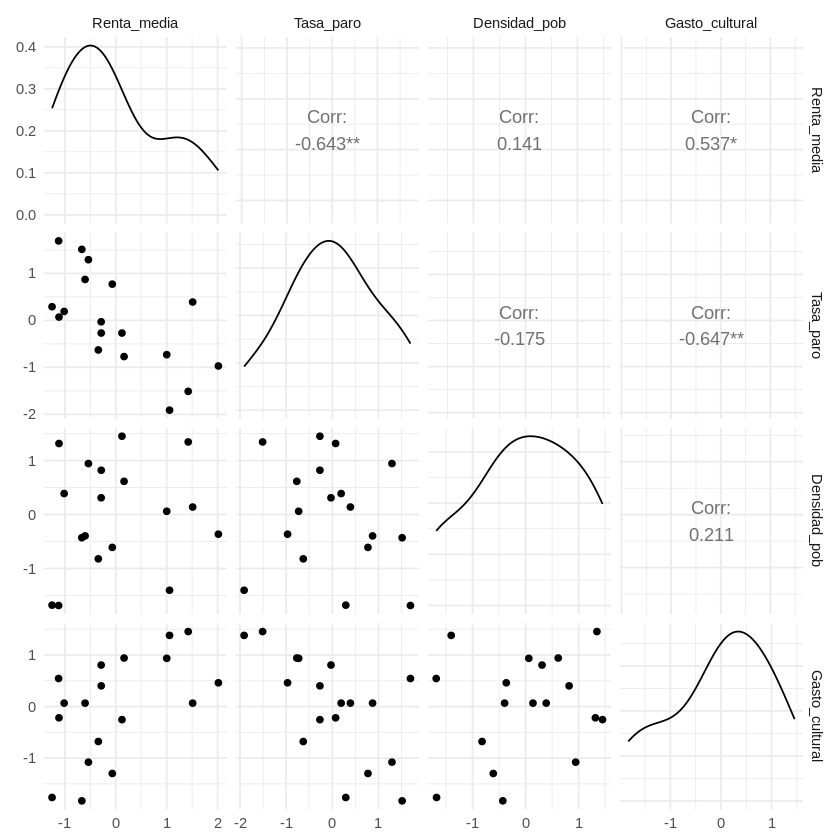

In [ ]:
# Seleccionar solo variables numéricas
datos_est <- datos %>% select(where(is.numeric))

# ggpairs solo con columnas numéricas
ggpairs(datos_est) +
  theme_minimal()


**<u>Interpretación resultados</u>.-**   
La matriz de gráficos permite identificar varios patrones relevantes en las relaciones entre las variables socioeconómicas analizadas antes de proceder con el clustering. En primer lugar, destaca la **correlación negativa fuerte entre Renta_media y Tasa_paro** (–0.64). Esto sugiere que los municipios con mayores niveles de renta suelen presentar **menores tasas de desempleo**, una relación consistente en términos económicos y que introduce una dimensión clara de **bienestar económico** dentro del conjunto de datos. Dado el peso de ambas variables, esta dimensión podría influir notablemente en la formación de los clústeres si no se estandarizan adecuadamente.

También se observa una **correlación positiva moderada entre Renta_media y Gasto_cultural** (0.54). Esta asociación indica que los municipios con mayor nivel de renta tienden a realizar **mayores inversiones culturales por habitante**, lo que sugiere que la capacidad económica local podría estar relacionada con prioridades políticas o disponibilidad presupuestaria para actividades culturales. Esta relación apunta hacia una posible dimensión vinculada al **desarrollo cultural asociado al nivel económico**.

Por otro lado, la variable **Tasa_paro muestra una correlación negativa destacada con Gasto_cultural** (–0.65). Esto refuerza la idea de que municipios con peor situación laboral destinan proporcionalmente **menores recursos a actividades culturales**, lo cual podría diferenciar perfiles municipales con limitaciones presupuestarias respecto a aquellos con mayor holgura financiera.

En cuanto a **Densidad_pob**, sus correlaciones con el resto de variables son débiles, lo que indica que la densidad demográfica no sigue patrones claros ni con la renta, ni con la tasa de paro, ni con el gasto cultural. Esto sugiere que podría representar una **dimensión independiente**, relacionada más con características urbanísticas que con factores económicos.

En conjunto, los patrones observados apuntan a la existencia de **dos dimensiones principales**: una **socioeconómica**, definida por renta, paro y gasto cultural, y otra **demográfica**, vinculada a la densidad de población. Estas dimensiones anticipan la posible formación de clústeres que diferencien municipios económicamente favorecidos con mayor inversión cultural frente a municipios con menor renta y mayores tasas de paro, mientras que la densidad poblacional podría añadir matices estructurales adicionales

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Ahora se calculará la matriz de proximidad o matriz de distancias entre las observaciones.

Se usará la función `dist()` para construir una matriz de distancias, que pertenece a la librería `base`. Se usará de la siguinete forma `dist(x, method = "euclidean")`, donde:

+ **x**: es el data numérico que contiene las observaciones y las variables.

+ **method**: indica el tipo de distancia que se desea calcular, en este caso se usarán:
  - "euclidean" (distancia euclidiana, por defecto)
  
  - "manhattan" (Manhattan o city-block)
  

La función devolverá un objeto de clase `dist`, que almacena la matriz de distancias.




In [ ]:
# Calculamos la matriz de distancias empleando la distancia euclidiana
datos_dist = dist(datos_est, method = "euclidean")

In [ ]:
# Mostramos la estructura de la matriz de distancias
str(datos_dist)

 'dist' num [1:153] 2.8 2.65 2.13 1.64 3.43 ...
 - attr(*, "Size")= int 18
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = datos_est, method = "euclidean")


In [ ]:
# Mostramos las primeras seis filas de la matriz de distancias
matrix_dist = as.matrix(datos_dist)[1:6, 1:6]
head(matrix_dist)

,1,2,3,4,5,6
1,0.000000,2.801343,2.646987,2.133483,1.644945,3.426748
2,2.801343,0.000000,3.100130,1.930943,1.933205,4.311661
3,2.646987,3.100130,0.000000,1.586718,1.509222,2.908353
4,2.133483,1.930943,1.586718,0.000000,1.221399,3.763729
5,1.644945,1.933205,1.509222,1.221399,0.000000,2.833166
6,3.426748,4.311661,2.908353,3.763729,2.833166,0.000000


In [ ]:
# Instalamos la librería factoextra
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
# Cargamos la librería factoextra
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



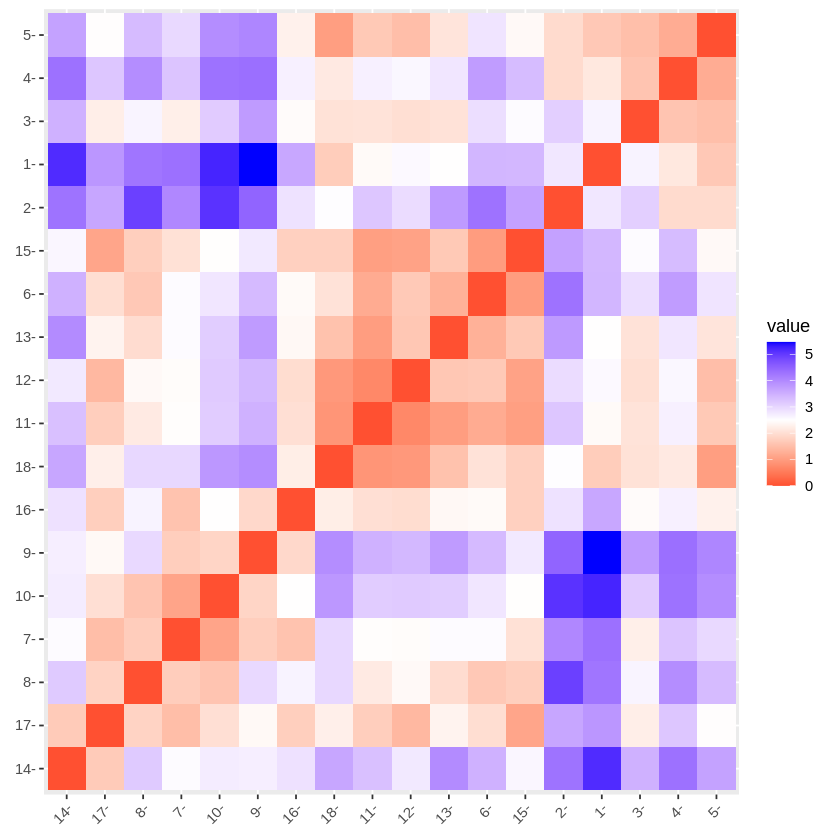

In [ ]:
# Representamos mediante escalas de color la distancia entre todas las observaciones para ver
# si detectamos grupos de observaciones
suppressWarnings(
  fviz_dist(datos_dist, show_labels = TRUE)
)

**<u>Interpretación resultados</u>.-**   La distancia usada es la **distancia euclidiana** la cuantifica **cuán diferentes son dos observaciones** midiendo la longitud del segmento que las une en un espacio multidimensional.

Si cada observación viene dada por $p$ variables, la distancia entre dos individuos $x = (x_1,\dots,x_p)$ e $y = (y_1,\dots,y_p)$ se calcula como:

$$
d_{\text{euclidiana}}(x,y)
= \sqrt{(x_1 - y_1)^2 + \cdots + (x_p - y_p)^2 }.
$$

– **Cuanto menor es la distancia**, más parecidas son las observaciones.  
– **Cuanto mayor es la distancia**, más diferentes son.  

El mapa de distancias muestra la matriz de proximidad entre los 18 municipios tras tipificar las variables y calcular la **distancia euclidiana** entre cada par de ellos. Cada celda representa la distancia entre dos municipios:  
– Tonos **rojizos** → distancias bajas → municipios **muy similares**.  
– Tonos **azulados** → distancias altas → municipios **muy diferentes**.

La diagonal principal aparece en rojo intenso, como es natural, ya que la distancia de cada municipio consigo mismo es cero.

Al analizar el patrón global, aparecen **zonas rojizas bien definidas** (especialmente hacia el centro del mapa y en la zona superior izquierda), lo que indica **bloques de municipios muy parecidos entre sí**, probablemente compartiendo niveles similares de renta, paro, densidad y gasto cultural. Estos bloques sugieren la presencia de **clústeres naturales y compactos**, que posteriormente deberían emerger con claridad en algoritmos jerárquicos.

Por otro lado, se observan **manchas azul oscuro** localizadas, especialmente en la parte inferior derecha y también en ala parte superior izquierda. Estas zonas señalan municipios que son **marcadamente distintos** al resto, ya sea por su renta media, por su estructura poblacional o por su intensidad de inversión cultural. Es probable que estos municipios actúen como **observaciones aisladas** dentro del clustering o formen grupos muy reducidos.

Finalmente, combinando las áreas rojizas continuas con las zonas azuladas dispersas, el mapa sugiere la existencia de **entre dos y cuatro grupos** de municipios con perfiles socioeconómicos diferenciados, lo cual respalda la pertinencia de avanzar hacia un análisis de clúster jerárquico.


In [ ]:
# Calculamos la matriz de distancias empleando la distancia euclidiana
datos_dist2 = dist(datos_est, method = "manhattan")

In [ ]:
# Mostramos la estructura de la matriz de distancias
str(datos_dist2)

 'dist' num [1:153] 3.59 4.58 3.84 3.01 5.82 ...
 - attr(*, "Size")= int 18
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "manhattan"
 - attr(*, "call")= language dist(x = datos_est, method = "manhattan")


In [ ]:
# Mostramos las primeras seis filas de la matriz de distancias
matrix_dist2 = as.matrix(datos_dist2)[1:6, 1:6]
head(matrix_dist2)

,1,2,3,4,5,6
1,0.000000,3.588293,4.583252,3.835839,3.005751,5.821501
2,3.588293,0.000000,5.611990,3.857730,3.144658,8.470988
3,4.583252,5.611990,0.000000,2.764572,2.577750,4.406847
4,3.835839,3.857730,2.764572,0.000000,2.153910,6.530774
5,3.005751,3.144658,2.577750,2.153910,0.000000,5.326330
6,5.821501,8.470988,4.406847,6.530774,5.326330,0.000000


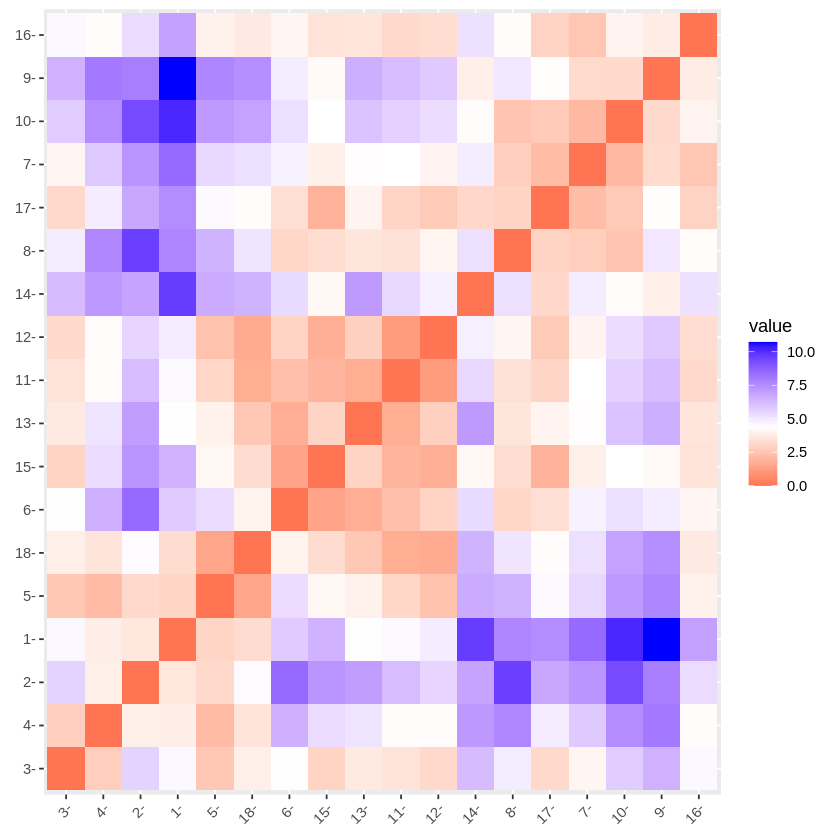

In [ ]:
# Representamos mediante escalas de color la distancia entre todas las observaciones para ver
# si detectamos grupos de observaciones
suppressWarnings(
  fviz_dist(datos_dist2, show_labels = TRUE)
)

**<u>Interpretación resultados</u>.-**  Antes de analizar el mapa de distancias, es importante comprender cómo se calcula la **distancia Manhattan**, ya que es el método utilizado en esta visualización. La distancia Manhattan entre dos observaciones $x = (x_1, x_2, …, x_p)$ y $y = (y_1, y_2, …, y_p)$ se define como:

$$d_{\text{Manhattan}}(x,y)=\sum_{j=1}^{p} |x_j - y_j|$$

Es decir, suma las diferencias absolutas entre cada par de variables. A diferencia de la distancia euclidiana (que eleva al cuadrado y luego hace raíz), la Manhattan mide cuánto habría que "caminar en líneas rectas" para pasar de un punto al otro, como si recorriéramos una ciudad en manzanas. Este método es **más robusto frente a valores atípicos** y tiende a producir distancias mayores que la euclidiana, motivo por el cual aquí el rango se extiende aproximadamente hasta **10 unidades**.


Una vez entendido la distancia utilizada, el mapa de distancias muestra la matriz de proximidad entre los 18 municipios tras tipificar las variables y calcular la **distancia euclidiana** entre cada par de ellos. Cada celda representa la distancia entre dos municipios:  
– Tonos **rojizos** → distancias bajas → municipios **muy similares**.  
– Tonos **azulados** → distancias altas → municipios **muy diferentes**.


Al igual que con la distancia euclidiana, la diagonal principal es roja, porque cada observación es idéntica a sí misma ($d = 0$). Pero el patrón fuera de la diagonal es diferente.

En la visualización se observan **bloques rojizos compactos**, especialmente en la parte central y en determinadas franjas diagonales secundarias, lo que sugiere *subgrupos de observaciones muy parecidas entre sí*. Estos bloques anticipan la existencia de **clústeres bien cohesionados**, donde las diferencias internas son relativamente bajas.

En contraste, hay regiones claramente azuladas, en la zona superior izquierda y en la inferior derecha, que representan **conjuntos de observaciones muy distintas**, lo que puede corresponder a grupos más heterogéneos, observaciones atípicas o perfiles extremos que se separarán pronto en un proceso de clustering.

El mayor rango de variación (hasta valores cercanos a 10) refleja la **sensibilidad de la distancia Manhattan a la suma de diferencias absolutas**, lo cual puede generar contrastes más marcados que la distancia euclidiana. Esto se traduce en zonas azul oscuro especialmente intensas, indicando observaciones que se alejan claramente del resto.

Finalmente, combinando las áreas rojizas continuas con las zonas azuladas, el mapa sugiere la presencia de **entre dos y cuatro agrupaciones naturales**, consistentes con los patrones observados también bajo otras métricas.


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

A continuación se procederá a **estimar e interpretar los modelos de clustering jerárquico divisivos** utilizando como base las **matrices de proximidad calculadas previamente** mediante las distancias **euclidiana** y **Manhattan**.  

Para ello se empleará la función **`diana()`**, perteneciente a la librería `cluster`. Esta función implementa el algoritmo **DIANA (Divisive Analysis)**, que construye los clústeres de forma **divisiva**, es decir, comenzando con **todas las observaciones en un único grupo** y separándolas iterativamente según su nivel de heterogeneidad. Se usará de la siguiente forma:

$$\texttt{diana(x, metric, stand, keep.diss)}$$

donde:

+ **`x`**:que será un data.frame con los datos estandarizados.

+ **`metric`**: define la medida de distancia que se utilizará sobre `x`. Las opciones disponibles en `diana()` son únicamente `"euclidean"` y `"manhattan"`.  
  Las cuales son justo las que se utilizarán.

+ **`stand`**: si se establece en `TRUE`, los datos serán estandarizados antes de calcular las distancias. Pero como en`x` estos ya estan estandarizados, este argumento se ignora.

+ **`keep.diss`**: indica si se debe conservar la matriz de distancias dentro del objeto final. En este caso se mantendrá como `TRUE`pero no es relevante, de hecho si se configura este argumento como `FALSE` reduce el tamaño del objeto en memoria.




In [ ]:
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(cluster)

In [ ]:
# Estimamos el clúster jerárquico con método divisivo y distancia euclidiana
HCD_diana = diana(datos_est, metric = "euclidean", keep.diss=TRUE)

In [ ]:
# Constatamos la clase del objeto
class(HCD_diana)

[1] "diana" "twins"

In [ ]:
# Información obtenida del clúster jerárquico con método divisivo y distancia euclidiana
str(HCD_diana)

List of 7
 $ order : int [1:18] 1 5 18 3 4 2 6 15 11 12 ...
 $ height: num [1:17] 1.71 1.01 2.65 1.59 3.1 ...
 $ dc    : num 0.723
 $ merge : int [1:17, 1:2] -11 -6 -5 -7 -3 1 2 -14 -1 4 ...
 $ diss  : 'dissimilarity' num [1:153] 2.8 2.65 2.13 1.64 3.43 ...
  ..- attr(*, "Size")= int 18
  ..- attr(*, "Metric")= chr "euclidean"
 $ call  : language diana(x = datos_est, metric = "euclidean", keep.diss = TRUE)
 $ data  : num [1:18, 1:4] 1.42 1.06 1.51 2.02 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "Renta_media" "Tasa_paro" "Densidad_pob" "Gasto_cultural"
 - attr(*, "class")= chr [1:2] "diana" "twins"


**<u>Interpretación resultados</u>.-**  
El objeto generado (`HCD_diana`) contiene una lista con **7 elementos**, cuya estructura corresponde al resultado estándar del algoritmo **DIANA** (Divisive Analysis). Estos elementos son distintos a los que se obtienen en el clustering aglomerativo explicados en el ejercicio 3, dado que aquí el proceso se construye al revés: se parte de **un único gran clúster inicial** y se realizan **divisiones sucesivas** en función de la disimilitud entre las observaciones.

A continuación se describen los componentes más relevantes:

+ **`merge`**: matriz que **registra todas las divisiones realizadas durante el procedimiento divisivo**.  
  - En cada fila se representa **un paso de división**, indicando qué elementos se separan del grupo del que formaban parte.  
  - Al igual que en el clustering aglomerativo, los **valores negativos** representan **observaciones individuales** del conjunto de datos.  
  - Los **valores positivos** corresponden a **subgrupos previamente creados** en alguna división anterior y que ahora vuelven a subdividirse.  
  

+ **`height`**: vector numérico que recoge el **nivel de disimilitud en el que se produce cada división**. Valores más altos indican rupturas más pronunciadas dentro de la estructura de los datos.

+ **`dc`**: coeficiente que resume la **divisividad global** del conjunto. Valores más altos indican una estructura más clara para ser separada en divisiones sucesivas.

+ **`diss`**: objeto de clase `dissimilarity` que contiene la **matriz de distancias** utilizada por el método divisivo. En este caso, dicha matriz ha sido calculada con la **distancia euclidiana**, tal y como refleja el atributo `"Metric" = "euclidean"`.

+ **`order`**: indica el **orden óptimo de las observaciones** para representar el dendrograma resultante.

+ **`data`**: matriz estandarizada o sin estandarizar (según la configuración, en este caso estadarizada) que contiene las observaciones empleadas como entrada del algoritmo.

A continuación se mostrará como extraer dichas variables del objeto.


In [ ]:
# Matriz que describe todas las divisiones realizadas durante el proceso jerárquico
head(HCD_diana$merge, 20)

-11,-12
-6,-15
-5,-18
-7,-10
-3,-4
1,-13
2,6
-14,-17
-1,3
4,-9
7,-8


Explicación de los pasos que sigue el modelo:

**División 1:**  
`-11   -12`

El algoritmo toma el grupo completo inicial y detecta que **las observaciones 11 y 12 son las más disímiles respecto al resto del conjunto**.  
Por tanto, la **primera división** separa del grupo original un subgrupo formado por **{11, 12}**.

Esto genera el **subgrupo 1**, que corresponde a `{11, 12}`.

 **División 2:**  
`-6   -15`

Aquí el algoritmo encuentra que **las observaciones 6 y 15**, dentro del grupo principal restante, forman un pequeño bloque disímil respecto al resto, y las separa como **nuevo subgrupo**.

Se crea el **subgrupo 2 = {6, 15}**.

Sigue este procedimiento hasta la división 6, ya que se encuentra un número positivo por lo que ya no es una observación sino un subgrupo.

**División 6:**  
`1   -13`

Aquí aparece el primer **número positivo**:

- `1` → el subgrupo creado en la división 1, que era `{11, 12}`
- `-13` → la observación 13

Esto crea el **subgrupo 6**, que contiene:

**{11, 12, 13}** quede dividido en  
- lado 1: (subgrupo "1")  
- lado 2: observación 13

In [ ]:
# Matriz que describe todas las divisiones realizadas durante el proceso jerárquico
HCD_diana$height

[1] 1.7119334 1.0054154 2.6469873 1.5867184 3.1001305 5.4678598 0.9825092
 [8] 1.6597563 0.6932600 1.6597563 2.4001156 3.9831622 1.1048929 1.8428596
[15] 2.4843682 2.8709813 1.6835623

In [ ]:
# Vector con el orden óptimo de las observaciones para dibujar el dendrograma sin cruces
HCD_diana$order

[1]  1  5 18  3  4  2  6 15 11 12 13  8  7 10  9 16 14 17

In [ ]:
# Contiene el valor que indica la intensidad de cuán clara es la primera división del dataset
HCD_diana$dc

[1] 0.7225008

In [ ]:
# Matriz de disimilitudes utilizada por el algoritmo para determinar las divisiones
head(HCD_diana$diss)

[1] 2.801343 2.646987 2.133483 1.644945 3.426748 4.339410

In [ ]:
# Instrucción exacta utilizada para generar el objeto diana
HCD_diana$call

diana(x = datos_est, metric = "euclidean", keep.diss = TRUE)

In [ ]:
# Contiene el dataset original utilizado para el clustering
HCD_diana$data

Renta_media,Tasa_paro,Densidad_pob,Gasto_cultural
1.42282273,-1.51040994,1.34442394,1.45485829
1.05636318,-1.91081316,-1.40282978,1.38068129
1.50996508,0.39150537,0.13882283,0.06626479
2.01512138,-0.96986559,-0.36460063,0.46088645
1.00115379,-0.72962365,0.06036723,0.93561927
-1.11488557,0.07118280,1.31565689,-0.21857490
-0.06840792,0.77188844,-0.60912059,-1.29859207
-0.53701445,1.29241263,0.94430036,-1.07902814
-1.25069682,0.29140457,-1.67873199,-1.76442365
-0.66666996,1.51263440,-0.42998030,-1.82969941


En un dendrograma generado mediante clustering jerárquico divisivo, la interpretación es diferente a la del método aglomerativo. El dendrograma muestra cómo un grupo grande se va rompiendo en subgrupos cada vez más homogéneos.

En el que eje vertical (altura) representa la disimilaridad en el momento en que se realiza la división. Por lo que cuanto más alta sea una bifurcación, más heterogéneo era el clúster antes de dividirse.

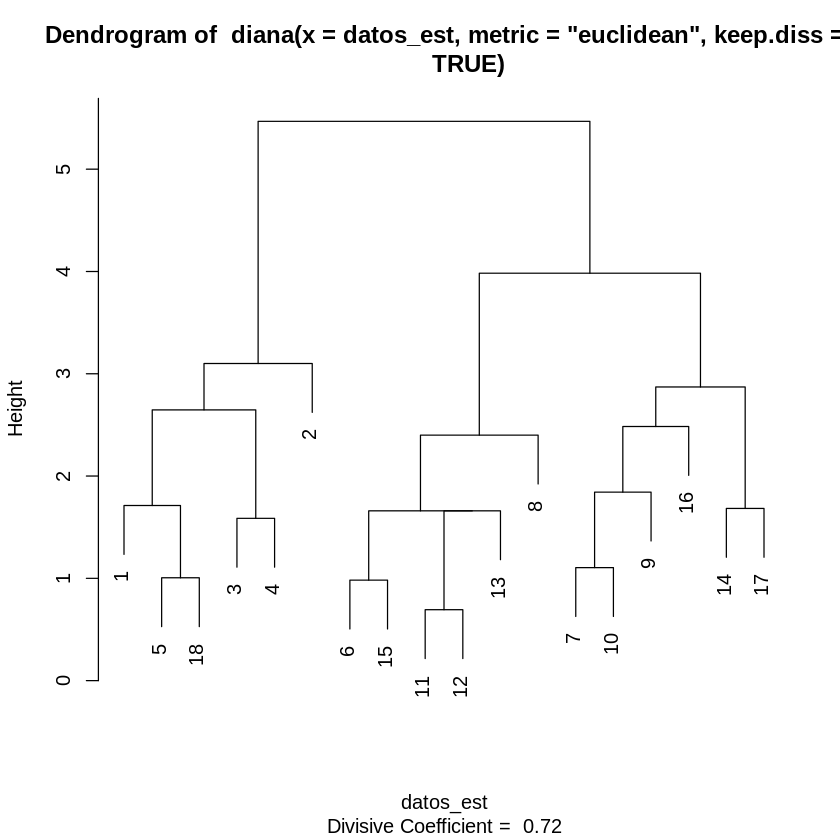

In [ ]:
# Construimos el dendrograma correspondiente al HCD
plot(HCD_diana, which = 2)

**<u>Interpretación resultados.-</u>**  
El dendrograma obtenido mediante el método jerárquico **divisivo DIANA** (usando distancia euclidiana) refleja el proceso inverso al clustering aglomerativo: en lugar de fusionar observaciones, **se parte de un único grupo que se va dividiendo sucesivamente** en subgrupos cada vez más homogéneos. La altura del dendrograma representa la *disimilitud* en el momento en que se produce cada división.

El primer corte relevante ocurre en una altura aproximada a **5.5**, donde el conjunto completo de observaciones se divide en **dos grandes clústeres principales**. Esto indica que la separación inicial es fuerte: existen dos grupos claramente diferenciados en términos de las variables utilizadas.

- **Primer gran clúster (izquierda del dendrograma)**: incluye a las observaciones  
  **1, 5, 18, 3, 4, 2**.  
  Estas observaciones presentan **baja distancia interna**, como se aprecia por la escasa altura de sus divisiones internas (todas por debajo de 3). Se trata de un clúster **compacto y homogéneo**, lo que indica perfiles muy similares entre sí.

- **Segundo gran clúster (derecha del dendrograma)**: formado por las observaciones  
  **6, 15, 11, 12, 13, 8, 7, 10, 9, 16, 14, 17**.  
  La estructura interna es más diversa: algunas divisiones se producen a alturas más elevadas, lo que refleja **mayor heterogeneidad**.  
  Dentro de este macrogrupo se identifican varios subclústeres cohesionados, como:
  - **(6, 15, 11, 12)** es un grupo muy compacto (divisiones < 1.5).  
  - **(7, 10)** es un par muy similar entre sí.  
  
La comparación entre ambos lados del dendrograma revela que el **primer gran clúster es más compacto**, mientras que el segundo presenta una estructura más ramificada, indicando diferentes subperfiles dentro de él.

El **coeficiente divisivo** obtenido (DC = 0.72) confirma que la estructura de grupos está **bien definida**: valores cercanos a 1 reflejan divisiones claras y grupos internamente homogéneos.

En conjunto, el dendrograma sugiere la presencia de **dos clústeres principales**, cada uno con subestructuras internas.

Por si no se entiende el gráfico se realizará otrocon la intención de mayor claridad, los resultaods son equivalentes es solo otra forma de mostralo.


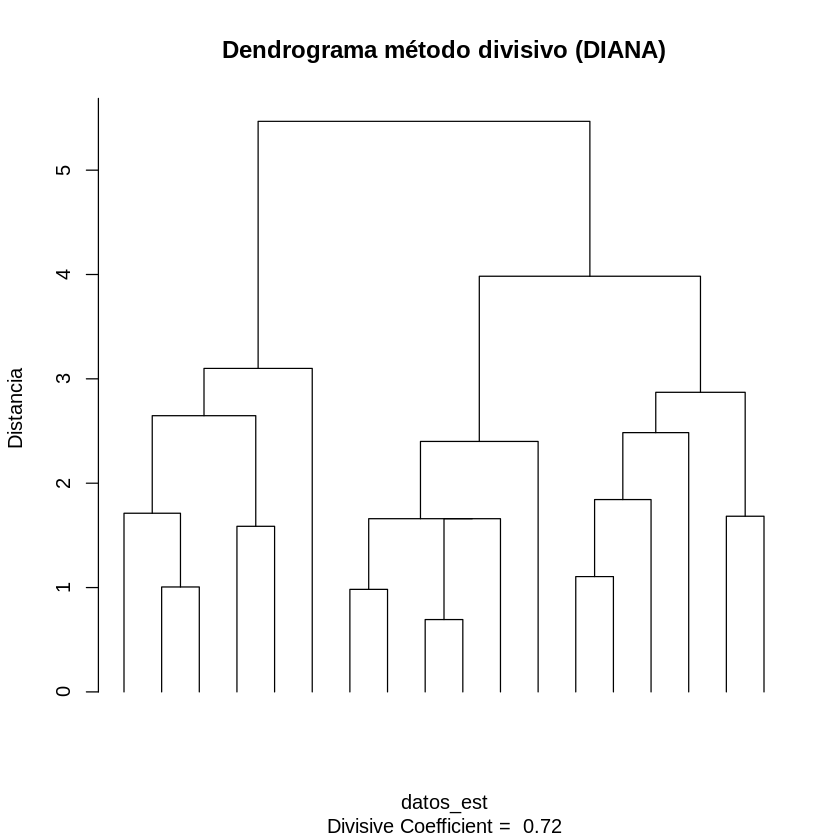

In [ ]:
# Construimos el dendrograma del HCD (con cambios)
plot(HCD_diana, main = "Dendrograma método divisivo (DIANA)",
     hang = -1, cex = 0.2, ylab = "Distancia", labels = FALSE, which=2)

Por si de la forma anterir tampoco seentendiera, a continuación se hara un dendograma pero solo con 10 observaciones para así simplificarlo.

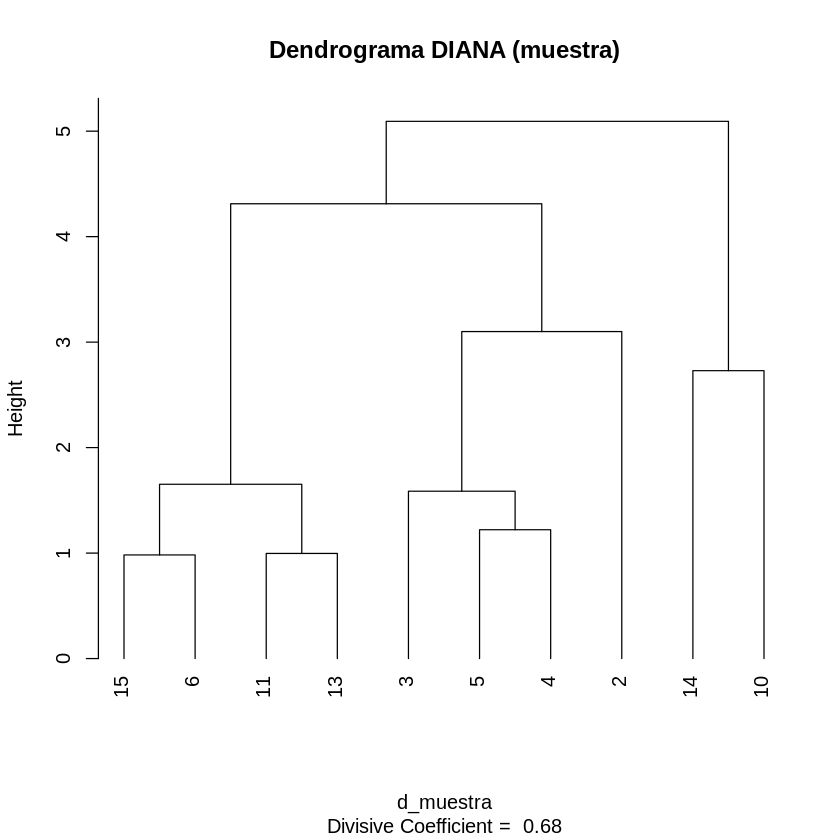

In [ ]:
# Fijamos una semilla para asegurar que la selección aleatoria sea reproducible
set.seed(123)

# Seleccionamos aleatoriamente 10 observaciones (municipios) del dataset. Esto reduce la complejidad visual del dendrograma sin perder estructura
idx_muestra = sample(1:nrow(datos_est), 10)

# Calculamos la matriz de distancias solo para la muestra seleccionada. Usamos la distancia euclidiana por defecto
d_muestra = dist(datos_est[idx_muestra, ])

# Aplicamos el clustering jerárquico usando el método del centroide igual que antes
HCD_muestra = diana(d_muestra, metric = "euclidean")

# Representamos el dendrograma correspondiente. hang = -1 alinea las hojas en la base para mejorar la visualización
plot(HCD_muestra, hang = -1, main = "Dendrograma DIANA (muestra)", which=2)

Este es el estudio sobre la distancia euclidia ahora se realizará sobre la distancia Manhattanpor lo que solo se realizará el dendograma, no se obtendran las variables desde el objeto ya que es de la misma forma realizada con la euclidiana.

In [ ]:
# Estimamos el clúster jerárquico con método divisivo y distancia euclidiana
HCD_diana2 = diana(datos_est, metric = "manhattan", keep.diss=TRUE)

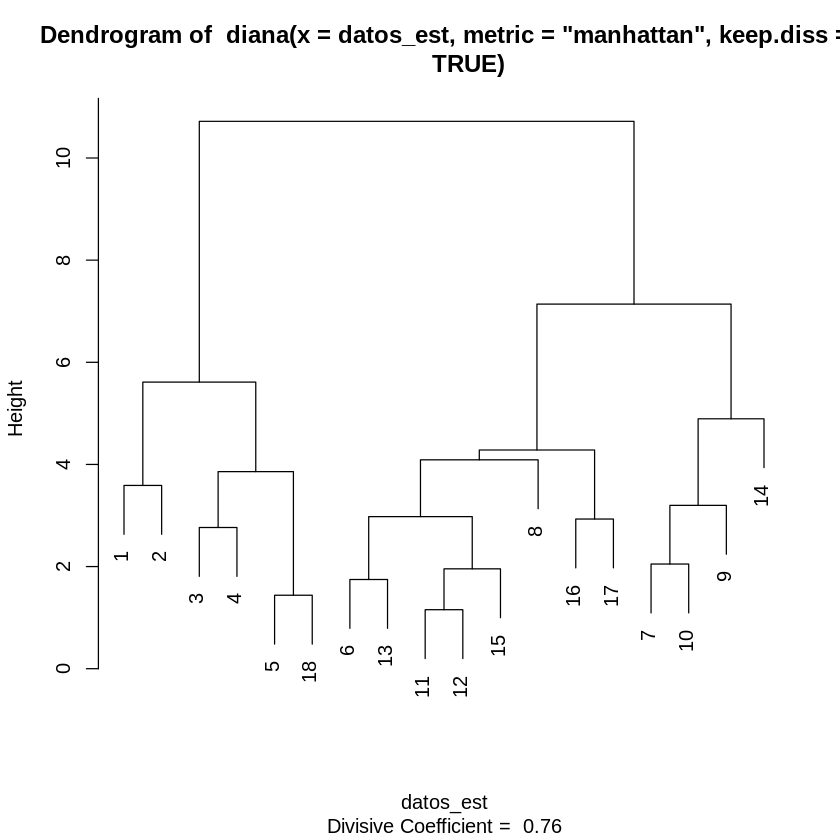

In [ ]:
# Construimos el dendrograma correspondiente al HCD
plot(HCD_diana2, which = 2)

<u>Interpretación resultados.-</u>

El dendrograma generado mediante el método jerárquico **divisivo DIANA**, empleando ahora la **distancia Manhattan**, muestra nuevamente el proceso de separación progresiva de un único grupo inicial en subgrupos cada vez más homogéneos. Como en el caso anterior, la altura representa la **disimilitud** en el momento en que cada división tiene lugar, pero al utilizar Manhattan en lugar de Euclidiana, las distancias tienden a ser mayores y captar diferencias absolutas entre variables.

El primer corte importante aparece aproximadamente a una altura cercana a **10**, lo cual indica que la separación inicial en dos grandes grupos requiere una disimilitud mayor que en el caso euclidiano. Esto es coherente con la naturaleza de la distancia Manhattan, que suele producir valores más elevados.

- Primer gran clúster (parte izquierda del dendrograma)
Incluye las observaciones:  
**1, 2, 3, 4, 5, 18**

Este grupo se divide a alturas relativamente bajas (todas por debajo de 5 considerando la altura de la primera división), lo que indica que se trata de un conjunto **cohesionado**.  
Dentro de él se observan subestructuras claras, como:  
- Parejas muy similares: **(5, 18)** y **(3, 4)**  


Este clúster representa un grupo **homogéneo**, con perfiles muy próximos según la métrica Manhattan.

- Segundo gran clúster (parte derecha del dendrograma)
Compuesto por:  
**6, 13, 11, 12, 15, 8, 16, 17, 7, 10, 9, 14**

Su estructura interna es más compleja, con ramificaciones que se desarrollan en niveles de altura más elevados, lo que refleja **mayor heterogeneidad** interna. Aun así, dentro de él se observan subgrupos bien definidos:

- **(6, 13)** forman un núcleo compacto que posteriormente se une a **(11, 12, 15)**, todos ellos mostrando divisiones inferiores a 4.  
- El subgrupo **(16, 17)** aparece como un par de alta similitud interna.  
- El conjunto **(7, 10, 9)** forma otro bloque cohesionado que posteriormente se une a la observación **14**, algo más alejada.

En comparación con el caso euclidiano, este macrogrupo muestra **aún más heterogeneidad**, especialmente en los bloques donde las diferencias absolutas entre las variables son relevantes.



- Se distinguen **dos clústeres principales**, separados a una altura relativamente elevada (≈10).  
- El **primer clúster** es más compacto y homogéneo.  
- El **segundo clúster** presenta mayor variabilidad interna y ramificaciones más profundas.  
- El **coeficiente divisivo** (DC = 0.76) es ligeramente superior al obtenido con Euclidiana, sugiriendo que Manhattan destaca divisiones más marcadas.

El **coeficiente divisivo** obtenido (DC = 0.72) confirma que la estructura de grupos está **mejor definida que en la euclidiana**.


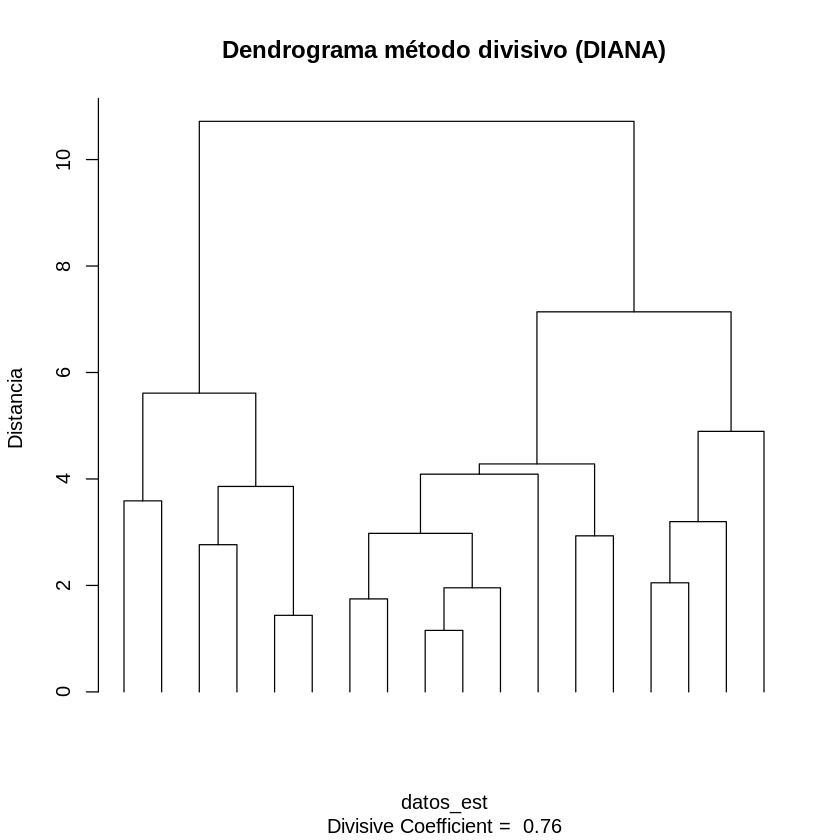

In [ ]:
# Construimos el dendrograma del HCD (con cambios)
plot(HCD_diana2, main = "Dendrograma método divisivo (DIANA)",
     hang = -1, cex = 0.2, ylab = "Distancia", labels = FALSE, which=2)

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

En esta sección se determinará el **número óptimo de clústers** para los modelos de clustering jerárquico divisivo estimados previamente.El objetivo es comprobar si la elección de la distancia utilizada modifica la partición recomendada.

Para cada una de estas distancias se aplicarán **tres criterios distintos de selección de clústers**, implementados mediante la función `NbClust()`, con el fin de obtener una recomendación robusta y comparativa:

1. **Método del codo (traceW)**: analiza la disminución de la suma de inercias intra-clúster a medida que aumenta el número de grupos. El número óptimo de clústers se identifica en el punto donde la reducción deja de ser significativa.

2. **Estadístico de Gap**: compara la compactación observada con la que cabría esperar en configuraciones aleatorias, seleccionando el número de clústers para el cual la separación entre ambas es máxima.

3. **Silueta promedio**: evalúa simultáneamente la cohesión interna y la separación entre clústers; se elige el número de grupos que maximiza la calidad global de la partición.




Se seguirá el mismo procedimiento que en ele apartado anterior, se realizará primero el análisis sobre la distancia euclidiana y posteriormente la manhattan

In [ ]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería de NbClust
library(NbClust)

In [ ]:
# Fijamos semilla para reproducibilidad de los resultados
set.seed(123)

In [ ]:
# Seleccionamos el número óptimo de clústeres con el método del codo (tracew)
# Usamos la misma métrica de distancia (euclidiana)
# method es el método de enlace que NbClust usa para generar particiones al evaluar k
diana_Elbow = NbClust(data = datos_est, distance = "euclidean", min.nc = 2, max.nc = 10,
                      method = "single", index = "tracew")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Elbow)

List of 3
 $ All.index     : Named num [1:9] 58.9 51 42.9 35.1 31.8 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ Best.nc       : Named num [1:2] 9 4.84
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition: int [1:18] 1 2 3 4 4 4 5 6 7 5 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Elbow)

$All.index
      2       3       4       5       6       7       8       9      10 
58.8504 51.0092 42.8847 35.1161 31.7623 29.6163 27.1967 16.3529 10.3468 

$Best.nc
Number_clusters     Value_Index 
         9.0000          4.8378 

$Best.partition
 [1] 1 2 3 4 4 4 5 6 7 5 4 4 4 8 4 9 4 4



**<u>Interpretación resultados.-</u>**  
El objeto `diana_Elbow` contiene tres elementos clave para evaluar el número óptimo de clústeres mediante el **índice tracew**, que mide la variabilidad interna no explicada por los grupos formados. Igual que ocurre en el análisis aglomerativo, el procedimiento consiste en examinar cómo disminuye esta suma de cuadrados intra‐clúster a medida que aumenta el número de grupos evaluado.

+ **`All.index`** recoge los valores del índice **tracew** para $k = 2, 3, …, 10$.  
  Se observa un descenso pronunciado al pasar de **2 → 3 → 4 → 5 clústeres o del 8 → 9**, lo cual indica mejoras sustanciales en la compactación de los grupos.  
  A partir de $k = 6$ y especialmente de $k = 7$ en adelante, la reducción del tracew es cada vez menor hasta el paso del octavo al nnoveno, mostrando una clara **pérdida de eficiencia**: el modelo gana complejidad sin lograr reducciones significativas en la variabilidad interna.  
  El cambio más marcado ocurre $k = 9$, de modo que la curva presenta un "codo" en esta zona.

+ **`Best.nc`** sugiere **9 clústeres** como valor óptimo ($ 4.8378$) según el criterio automático de `NbClust`. Este resultado se debe a que el índice tracew sigue disminuyendo hasta $k = 9$, y el algoritmo selecciona el valor mínimo alcanzado.

+ **`Best.partition`** asigna a cada observación el clúster correspondiente cuando se fija $k = 9$.



In [ ]:
# Número de clústers óptimo según el criterio de 'tracew'
diana_Elbow$Best.nc

Number_clusters     Value_Index 
         9.0000          4.8378

In [ ]:
# Extraemos el valor del índice tracew para cada número de clúster evaluado
wss_values = diana_Elbow$All.index

In [ ]:
# Creamos un vector con los valores de k correspondientes
k_values = 2:10

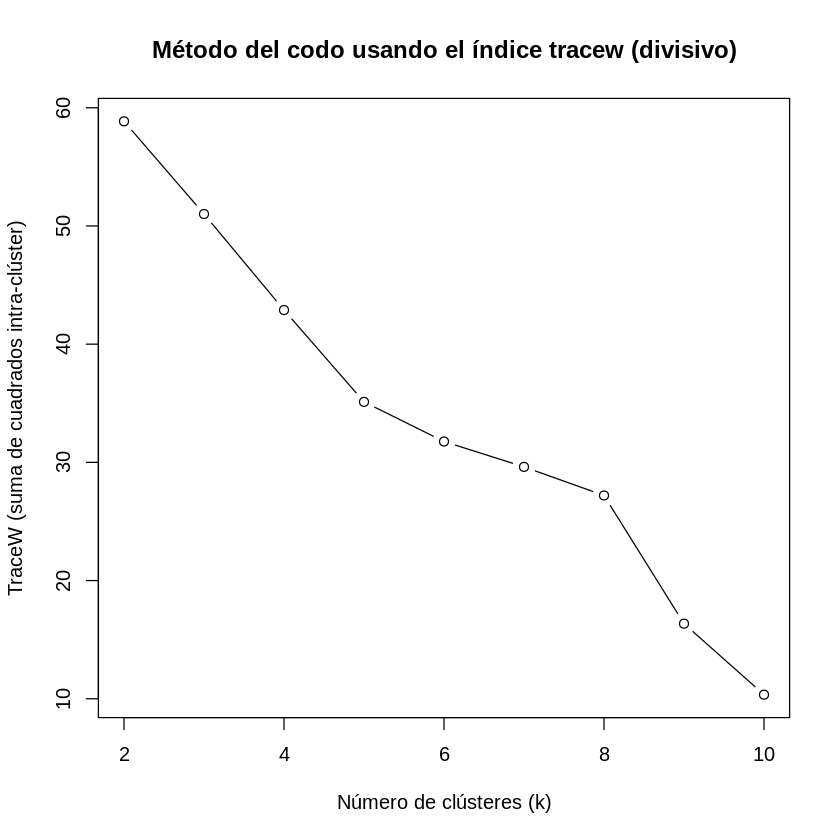

In [ ]:
# Representamos gráficamente el método del codo
plot(k_values, wss_values, type = "b", xlab = "Número de clústeres (k)",
     ylab = "TraceW (suma de cuadrados intra-clúster)", main = "Método del codo usando el índice tracew (divisivo)")

**<u>Interpretación resultados.-</u>**
Pese a no observarse un codo claro en la gráfica, osea un valor a partir del cual su valor de TraceW se mantiene casi constante, se aprecia que la mayor caída es en $k=9$ indicando que es el número óptimo de clusters según este método.

In [ ]:
# Seleccionamos el número de clústeres óptimo empleando el estadístico de Gap
# - distance = "euclidean": coherente con la métrica usada en DIANA
# - method: método de enlace que NbClust usa para generar las particiones de referencia
# - index = "gap": cálculo del estadístico de Gap para cada k
diana_Gap = NbClust(data = datos_est, distance = "euclidean", min.nc = 2, max.nc = 10,
                    method = "single", index = "gap")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Gap)

List of 4
 $ All.index         : Named num [1:9] -0.545 -0.642 -2.152 -2.427 -2.874 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ All.CriticalValues: Named num [1:9] 0.122 1.565 0.331 0.515 0.121 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ Best.nc           : Named num [1:2] 2 -0.545
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition    : int [1:18] 1 2 1 1 1 1 1 1 1 1 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Gap)

$All.index
      2       3       4       5       6       7       8       9      10 
-0.5451 -0.6416 -2.1518 -2.4268 -2.8736 -2.9295 -3.3248 -3.3194 -3.3627 

$All.CriticalValues
     2      3      4      5      6      7      8      9     10 
0.1224 1.5650 0.3309 0.5146 0.1214 0.4743 0.0881 0.1465 0.0567 

$Best.nc
Number_clusters     Value_Index 
         2.0000         -0.5451 

$Best.partition
 [1] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1



**<u>Interpretación resultados.-</u>**  
El objeto `diana_Gap` se divide en 4 elementos los cules se explicarán a continuación.

+ **`All.index`** recoge los valores del índice Gap para cada $k = 2, …, 10$.  
  En este caso, todos los valores son **negativos**, desde **–0.5451 (k=2)** hasta **–3.3627 (k=10)**.  
  Un Gap negativo indica que la calidad de los clústeres obtenidos con ese número de grupos es **peor que la obtenida en muestras aleatorias**, lo que evidencia una **estructura de clústeres débil o prácticamente inexistente** en los datos según este criterio.

+ **`All.CriticalValues`** contiene los valores esperados del Gap bajo el modelo nulo.  
  Esto confirma que las particiones reales no superan lo que se obtendría por azar por lo que **no se aprecia evidencia clara de agrupación** desde el punto de vista del Gap.

+ **`Best.nc`** sugiere **2 clústeres** como solución óptima porque es el valor que presenta el **Gap menos negativo** (–0.5451).  
  Sin embargo, esto no debe interpretarse como una evidencia fuerte: simplemente indica el "menos malo" entre valores que en conjunto son desfavorables.

+ **`Best.partition`** asigna las observaciones a **2 clústeres**, aunque como se observa la partición muestra un **grupo muy minoritario** (solo la observación 2) y un gran grupo con el resto de elementos.  
  Esta asimetría confirma que, para el criterio Gap, la estructura encontrada no es especialmente informativa.

En resumen, el estadístico Gap no detecta una estructura de clústeres sólida en los datos: todos los valores son negativos y claramente inferiores a los críticos del modelo nulo. Aunque propone $k=2$ como la mejor opción, la evidencia es **débil**, por lo que este criterio no respalda la divión indicada por el criterio anterior de múltiples clusters.


In [ ]:
# Número de clústeres óptimo según el estadístico de Gap
diana_Gap$Best.nc

Number_clusters     Value_Index 
         2.0000         -0.5451

In [ ]:
# Extraemos los valores del estadístico de Gap para cada k
gap_values = diana_Gap$All.index

In [ ]:
# Vector con los k evaluados
k_values = 2:10

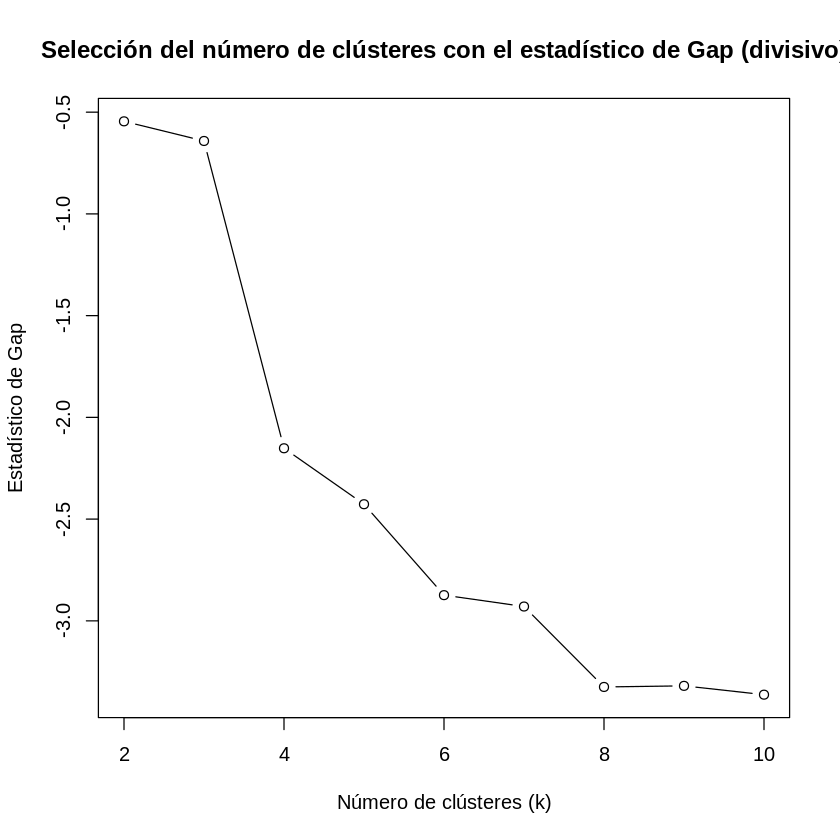

In [ ]:
# Representamos el estadístico de Gap en función de k
plot(k_values, gap_values, type = "b", xlab = "Número de clústeres (k)",
     ylab = "Estadístico de Gap", main = "Selección del número de clústeres con el estadístico de Gap (divisivo)")

**<u>Interpretación resultados.-</u>**  
El gráfico muestra como todos los valores son negativos, indicando que no hay una división que mejore al modelo nulo.


In [ ]:
# Seleccionamos el número de clúster óptimo empleando la silueta promedio
diana_Sil = NbClust(datos_est, distance = "euclidean", min.nc = 2, max.nc = 17,
                    method = "single", index = "silhouette")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Sil)

List of 3
 $ All.index     : Named num [1:16] 0.278 0.153 0.213 0.229 0.201 ...
  ..- attr(*, "names")= chr [1:16] "2" "3" "4" "5" ...
 $ Best.nc       : Named num [1:2] 17 0.915
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition: int [1:18] 1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Sil)

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
0.2783 0.1528 0.2130 0.2291 0.2005 0.2441 0.2878 0.4129 0.5169 0.5471 0.6271 
    13     14     15     16     17 
0.6549 0.7150 0.7815 0.8634 0.9151 

$Best.nc
Number_clusters     Value_Index 
        17.0000          0.9151 

$Best.partition
 [1]  1  2  3  4  5  6  7  8  9 10 11 11 12 13 14 15 16 17



**<u>Interpretación resultados.-</u>**  
El objeto `diana_Sil` se divide en 3 elementos los cules se explicarán a continuación. Este índice mide simultáneamente **cohesión interna** y **separación entre clústeres**, de modo que valores altos indican agrupamientos bien definidos.

+ **`All.index`** contiene los valores del índice silhouette para cada $k = 2, …, 17$.  
  Los valores comienzan siendo moderados (**0.2783 para k=2**) y van aumentando conforme crece el número de clústeres, alcanzando un máximo de **0.9151 para k=17**.  
  Esta tendencia indica que **cuantas más divisiones realiza el método DIANA, más "limpios" o separados quedan los clústeres**, al menos desde la perspectiva del silhouette.  
  El incremento progresivo sugiere que las divisiones sucesivas del algoritmo están generando grupos cada vez más homogéneos.
  Esto ocurre porque a partir de $k=9$ se obliga a que haya clusters con un solo elemnto lo que hará que su shilhouette sean cercanos a 1 debido a la cohesión interna perfecta al solo tener una observación.

+ **`Best.nc`** identifica como solución óptima **10 clústeres**, que es el valor para el cual la silueta promedio es máxima (0.5169).  
  Esto significa que, según este criterio, la partición más adecuada es la que produce **grupos muy pequeños pero extremadamente compactos**, lo cual es habitual cuando los datos no presentan grandes bloques naturales y el algoritmo separa elementos que son relativamente distintos entre sí.

+ **`Best.partition`** muestra la asignación de cada observación a los **17 clústeres** sugeridos.  
  Se observa una estructura muy fragmentada, donde algunos clústeres contienen **solo una observación** (por ejemplo, el clúster 2, el 3, el 4, el 7, el 8, el 9 y el 10).  
  Esta dispersión confirma que el silhouette está premiando particiones muy finas, típicas en situaciones donde los datos **no forman grupos grandes y bien diferenciados**, sino unidades más aisladas.




Como se observa el valor en $k=2$ es superior a los 6 siguientes esto indica que al igual que siguiendo el critero del Gap es mejor no dividir el conjunto de datos ya que es apartir del $k=8$ donde ya hay múltiples clusters unitarios que se consigue superar su valor.

In [ ]:
# Observamos el resultado óptimo
diana_Sil$Best.nc

Number_clusters     Value_Index 
        17.0000          0.9151

In [ ]:
# Cargamos la librería cluster
library(cluster)

In [ ]:
# Comprobamos la clase del objeto
class(HCD_diana)

[1] "diana" "twins"

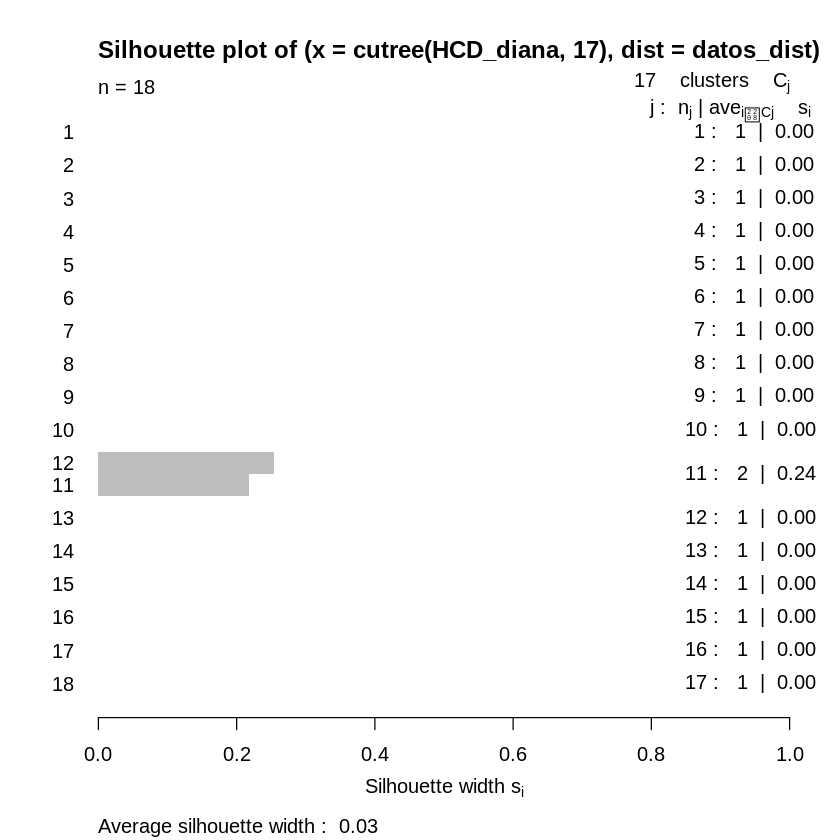

In [ ]:
# Para el HCD divisivo con distancia euclidiana y k=17 graficamos las siluetas
plot(silhouette(cutree(HCD_diana,17), datos_dist), border=NA)

ESte gráfico se ha heco con la intención de que se entienda que no es coherente el valor de clusters óptimos indicado con este criterio.

<u>Conclusión.-</u>
Debido a las evidencias obtenidas por los criterios 2 y 3 lo optimo sería no dividir la base, esto es devido al poco número de datos obtenido o ala distancia utilizada por eso se realizará lo mismo con la distancia manhatthan.

In [ ]:
# Fijamos semilla para reproducibilidad de los resultados
set.seed(123)

In [ ]:
# Seleccionamos el número óptimo de clústeres con el método del codo (tracew)
# Usamos la misma métrica de distancia (manhattan)
# method es el método de enlace que NbClust usa para generar particiones al evaluar k
diana_Elbow2 = NbClust(data = datos_est, distance = "manhattan", min.nc = 2, max.nc = 10,
                      method = "single", index = "tracew")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Elbow2)

List of 3
 $ All.index     : Named num [1:9] 58.9 51 42.9 35.1 32.5 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ Best.nc       : Named num [1:2] 5 5.15
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition: int [1:18] 1 2 3 3 3 3 3 3 4 3 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Elbow2)

$All.index
      2       3       4       5       6       7       8       9      10 
58.8504 51.0092 42.8847 35.1161 32.4986 30.3258 27.1967 16.3529 10.3468 

$Best.nc
Number_clusters     Value_Index 
         5.0000          5.1511 

$Best.partition
 [1] 1 2 3 3 3 3 3 3 4 3 3 3 3 5 3 3 3 3



**<u>Interpretación resultados.-</u>**  
La explicación sobre los elementos del objeto `diana_Elbow2` estan explicados ya con el ejemplo de la distancia euclidia.

Cabe resaltar que pese ha salir los mismos valores con el cambio de distancia ha pasdo de 9 clusters a 5 ademas de aumentar su valor de $4.83$ a  $5.15$ tambien se observa un cluster mucho mas grande que los otros 4 ya que estos son unitarios.



In [ ]:
# Número de clústers óptimo según el criterio de 'tracew'
diana_Elbow2$Best.nc

Number_clusters     Value_Index 
         5.0000          5.1511

In [ ]:
# Extraemos el valor del índice tracew para cada número de clúster evaluado
wss_values2 = diana_Elbow2$All.index

In [ ]:
# Creamos un vector con los valores de k correspondientes
k_values = 2:10

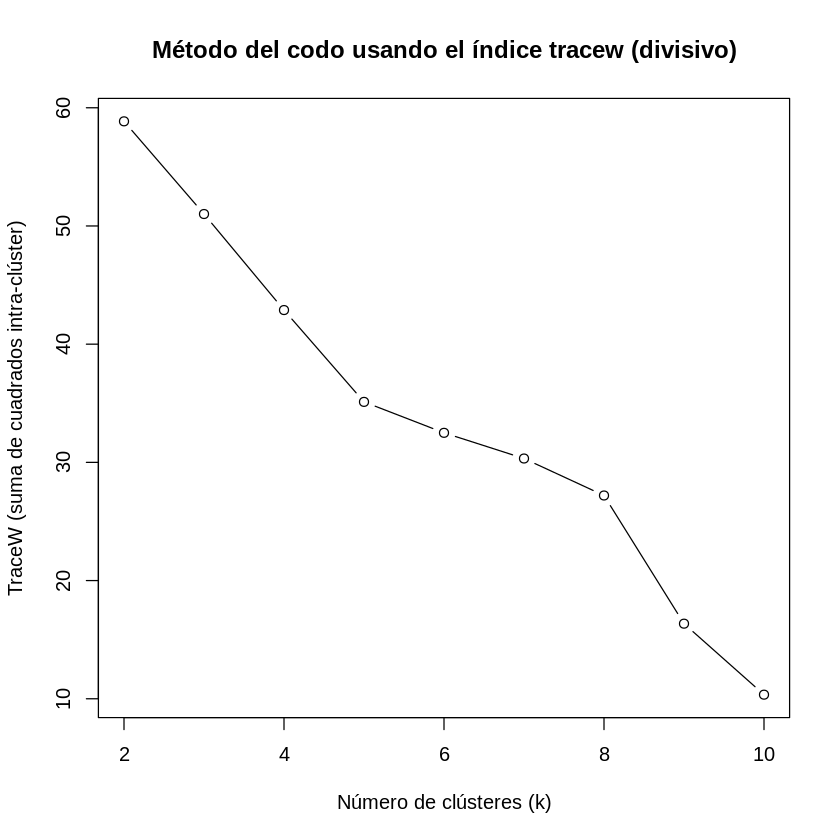

In [ ]:
# Representamos gráficamente el método del codo
plot(k_values, wss_values2, type = "b", xlab = "Número de clústeres (k)",
     ylab = "TraceW (suma de cuadrados intra-clúster)", main = "Método del codo usando el índice tracew (divisivo)")

**<u>Interpretación resultados.-</u>**
En la gráfica se observa como a partir del $k=5$ la caída se relantiza siendo este el codo.

In [ ]:
# Seleccionamos el número de clústeres óptimo empleando el estadístico de Gap
# - distance = "manhattan": coherente con la métrica usada en DIANA
# - method: método de enlace que NbClust usa para generar las particiones de referencia
# - index = "gap": cálculo del estadístico de Gap para cada k
diana_Gap2 = NbClust(data = datos_est, distance = "manhattan", min.nc = 2, max.nc = 10,
                    method = "single", index = "gap")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Gap2)

List of 4
 $ All.index         : Named num [1:9] -0.545 -0.642 -2.152 -2.427 -2.897 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ All.CriticalValues: Named num [1:9] 0.122 1.565 0.331 0.537 0.122 ...
  ..- attr(*, "names")= chr [1:9] "2" "3" "4" "5" ...
 $ Best.nc           : Named num [1:2] 2 -0.545
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition    : int [1:18] 1 2 1 1 1 1 1 1 1 1 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Gap2)

$All.index
      2       3       4       5       6       7       8       9      10 
-0.5451 -0.6416 -2.1518 -2.4268 -2.8965 -2.9532 -3.3248 -3.3194 -3.3627 

$All.CriticalValues
     2      3      4      5      6      7      8      9     10 
0.1224 1.5650 0.3309 0.5375 0.1221 0.4506 0.0881 0.1465 0.2613 

$Best.nc
Number_clusters     Value_Index 
         2.0000         -0.5451 

$Best.partition
 [1] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1



In [ ]:
# Número de clústeres óptimo según el estadístico de Gap
diana_Gap2$Best.nc


Number_clusters     Value_Index 
         2.0000         -0.5451

**<u>Interpretación resultados.-</u>**  
En este caso al salir exactamente los mismo resultados su interpretación es la misma, que no es peor que el modelo nulo.


In [ ]:
# Extraemos los valores del estadístico de Gap para cada k
gap_values2 = diana_Gap2$All.index

In [ ]:
# Vector con los k evaluados
k_values = 2:10

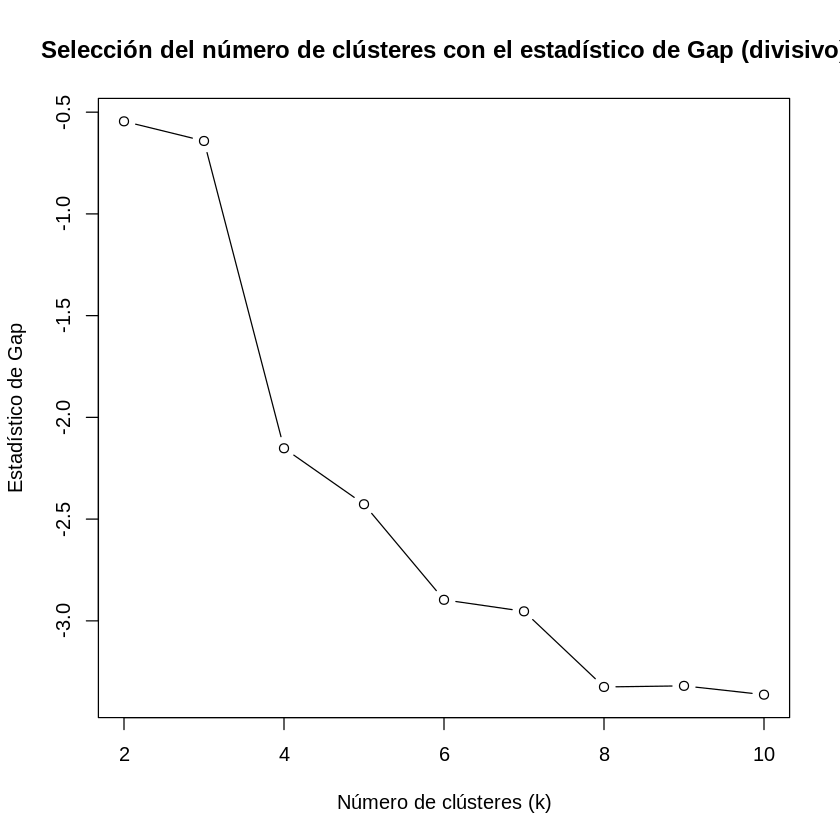

In [ ]:
# Representamos el estadístico de Gap en función de k
plot(k_values, gap_values2, type = "b", xlab = "Número de clústeres (k)",
     ylab = "Estadístico de Gap", main = "Selección del número de clústeres con el estadístico de Gap (divisivo)")

**<u>Interpretación resultados.-</u>**  
El gráfico muestra como todos los valores son negativos, indicando que no hay una divión que mejore al modelo nulo.


In [ ]:
# Seleccionamos el número de clúster óptimo empleando la silueta promedio
diana_Sil2 = NbClust(datos_est, distance = "manhattan", min.nc = 2, max.nc = 17,
                    method = "single", index = "silhouette")

In [ ]:
# Información obtenida con la función 'NbClust'
str(diana_Sil2)

List of 3
 $ All.index     : Named num [1:16] 0.292 0.137 0.201 0.252 0.221 ...
  ..- attr(*, "names")= chr [1:16] "2" "3" "4" "5" ...
 $ Best.nc       : Named num [1:2] 17 0.923
  ..- attr(*, "names")= chr [1:2] "Number_clusters" "Value_Index"
 $ Best.partition: int [1:18] 1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
# Información obtenida con la función 'NbClust' (vista completa)
show(diana_Sil2)

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
0.2922 0.1369 0.2006 0.2520 0.2208 0.2421 0.2777 0.3914 0.4912 0.5791 0.6358 
    13     14     15     16     17 
0.6729 0.7154 0.7565 0.8344 0.9228 

$Best.nc
Number_clusters     Value_Index 
        17.0000          0.9228 

$Best.partition
 [1]  1  2  3  4  5  6  7  8  9 10 11 11 12 13 14 15 16 17



**<u>Interpretación resultados.-</u>**
Como se observa el valor en $k=2$ es superior a los 7 siguinetes esto indica que al igual que siguinetdo el critero del Gap es mejor no dividir el conjunto de datos ya que es apartir del $k=9$ donde ya hay múltiples clusters unitarios que se consigue superar su valor.

In [ ]:
# Observamos el resultado óptimo
diana_Sil2$Best.nc

Number_clusters     Value_Index 
        17.0000          0.9228

In [ ]:
# Cargamos la librería cluster
library(cluster)

In [ ]:
# Comprobamos la clase del objeto
class(HCD_diana2)

[1] "diana" "twins"

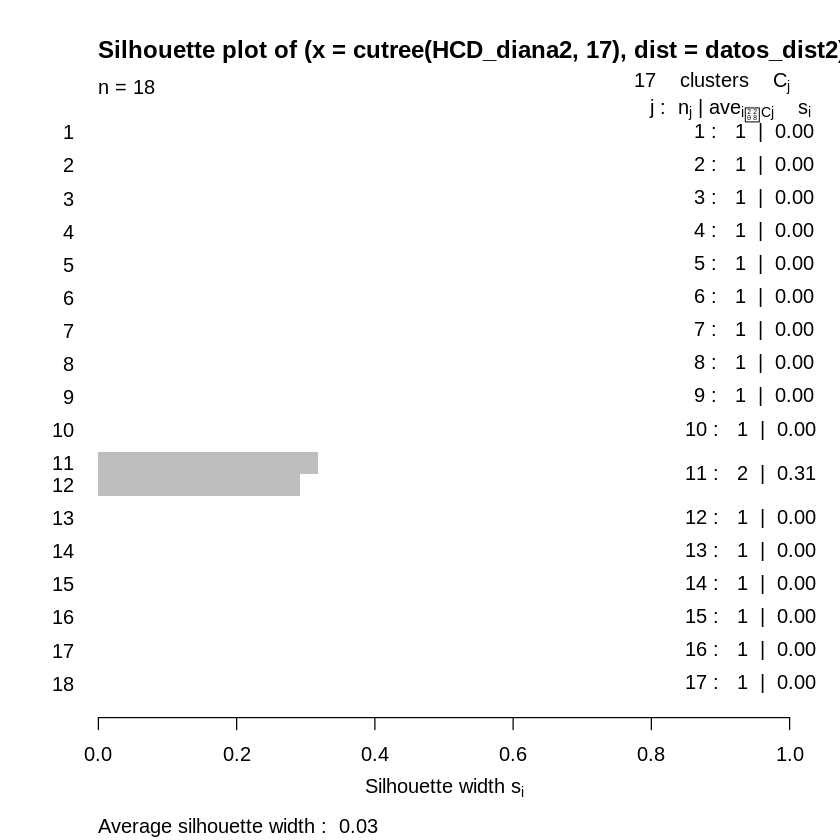

In [ ]:
# Para el HCD divisivo con distancia euclidiana y k=17 graficamos las siluetas
plot(silhouette(cutree(HCD_diana2,17), datos_dist2), border=NA)

Este gráfico se ha hecho con la intención de que se entienda que no es coherente el valor de clusters óptimos indicado con este criterio.

<u>**Conclusión.-**</u>
Debido a las evidencias obtenidas por los criterios 2 y 3 lo optimo sería no dividir la base, esto es devido al poco número de datos obtenido ya que se ha probado con dos distancias, posteriormente se aplicarán el enfoque aglomerativo con dos estrategias de enlace:

1. **Método complete (enlace completo)**: define la distancia entre dos clústeres como la separación máxima entre cualquiera de sus elementos. Tiende a generar grupos compactos y bien separados, aunque puede ser sensible a valores atípicos.

2. **Método average (enlace promedio)**: utiliza la distancia media entre todos los pares de observaciones pertenecientes a los dos clústeres a fusionar. Suele producir particiones más equilibradas y menos estrictas que el enlace completo, evitando tanto clústeres demasiado extensos como excesivamente compactos.

Antes de calcular la división en los clusters se calculará el número óptimo de clusters ya que si los criterios indican que no es óptimo dividir la base no se realizarán.

In [ ]:
# Seleccionamos el número de clúster óptimo empleando el método del codo
# distance = "euclidean": usamos distancia euclidiana
# min.nc, max.nc: rango de k que queremos evaluar
# method = "centroid": mismo método de aglomeración que en el HCA_centroide
# index = "tracew": criterio basado en la suma de cuadrados intra-clúster (método del codo)
centroid_Elbow = NbClust(data = datos_est, distance = "euclidean", min.nc = 2, max.nc = 10,
                        method = "centroid", index = "tracew")
centroid_Elbow$Best.nc

# Seleccionamos el número de clúster óptimo empleando el estadístico de Gap
# - index = "gap": cálculo del estadístico de Gap para cada k
centroid_Gap = NbClust(data = datos_est, distance = "euclidean", min.nc = 2, max.nc = 10,
                       method = "centroid", index = "gap")

centroid_Gap$Best.nc

# Seleccionamos el número de clúster óptimo empleando la silueta promedio
centroid_Sil = NbClust(datos_est, distance = "euclidean", min.nc = 2, max.nc = 10,
                       method = "centroid", index = "silhouette")

show(centroid_Sil)

Number_clusters     Value_Index 
         6.0000         10.1922

Number_clusters     Value_Index 
         2.0000         -1.2548

$All.index
     2      3      4      5      6      7 
0.2783 0.1905 0.2130 0.2291 0.3094 0.3135 

$Best.nc
Number_clusters     Value_Index 
         7.0000          0.3135 

$Best.partition
 [1] 1 2 3 3 3 3 4 5 6 4 3 3 3 7 3 3 3 3



In [ ]:
# Seleccionamos el número de clúster óptimo empleando el método del codo
# distance = "manhattan": usamos distancia manhattan
# min.nc, max.nc: rango de k que queremos evaluar
# method = "centroid": mismo método de aglomeración que en el HCA_centroide
# index = "tracew": criterio basado en la suma de cuadrados intra-clúster (método del codo)
centroid_Elbow2 = NbClust(data = datos_est, distance = "manhattan", min.nc = 2, max.nc = 10,
                        method = "centroid", index = "tracew")
centroid_Elbow2$Best.nc

# Seleccionamos el número de clúster óptimo empleando el estadístico de Gap
# - index = "gap": cálculo del estadístico de Gap para cada k
centroid_Gap2 = NbClust(data = datos_est, distance = "manhattan", min.nc = 2, max.nc = 10,
                       method = "centroid", index = "gap")

centroid_Gap2$Best.nc

# Seleccionamos el número de clúster óptimo empleando la silueta promedio
centroid_Sil2 = NbClust(datos_est, distance = "manhattan", min.nc = 2, max.nc = 10,
                       method = "centroid", index = "silhouette")

centroid_Sil2$Best.nc

show(centroid_Sil2)

Number_clusters     Value_Index 
         4.0000          8.7966

Number_clusters     Value_Index 
         2.0000         -1.2737

Number_clusters     Value_Index 
         2.0000          0.2175

$All.index
[1] 0.2175

$Best.nc
Number_clusters     Value_Index 
         2.0000          0.2175 

$Best.partition
 [1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1



**<u>Conclusión.-</u>**
Debido a la escasez de observaciones en la base de datos no es posible encontrar una división en clusters ni con el aglomeramiento ni con el divisivo.